In [3]:
# Llibreries necesaries pels gràfics
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


# Llibreries necessaries per l'exemple de SVM
import numpy as np
from sklearn.svm import SVC

## Funció per poder dibuixar les regions de classificació

El codi següent no és objecte d'aquesta assignatura, és original de la font d'aquesta explicació.

In [4]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')


## Generació dades

Com ja hem fet anteriorment generam dades amb les que treballar, aquest cop ens interessa que no siguin
linealment separables. Hi ha dues classes al nostre vector Y: les x de color blau i els quadrats de color vermell.

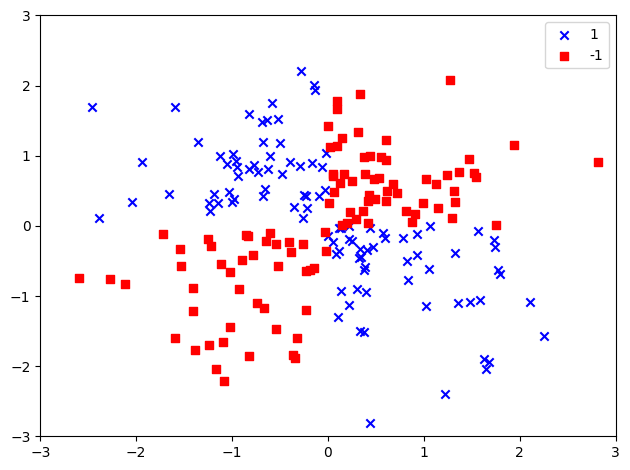

In [5]:
np.random.seed(33)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Classificació mitjançant un SVM lineal

Com es pot veure a continuació no és molt bon classificador, ja que les dades no són linealment
separables. No cercam els millors hiperparàmetres, ja que és un exemple molt senzill.

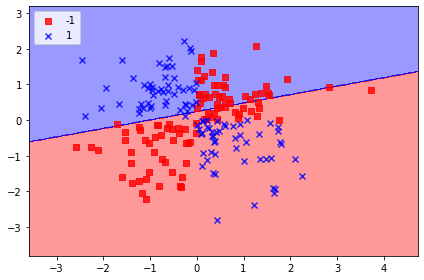

In [4]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Classificació amb un _Kernel_ RBF (Gaussià)

El _kernel_ RBF te la següent forma:

$$ K(x,z) = exp(-\frac{||x-z||^2}{2\sigma^2})$$

La implementació particular de la llibreria _Scikit_ substitueix $\frac{1}{{2\sigma^2}}$ per $\gamma$.

Com hem definit, $\gamma$ és l'inversa de la desviació estàndard del _kernel_ `RBF` i s'utilitza com a mesura de semblança entre dos punts. Intuïtivament, un valor **gamma petit defineix una funció gaussiana amb una gran variància**. En aquest cas, dos punts es poden considerar semblants encara que estiguin lluny l'un de l'altre. D'altra banda, un valor **gamma gran significa definir una funció gaussiana amb una petita variància** i en aquest cas, dos punts es consideren semblants només si estan a prop l'un de l'altre.


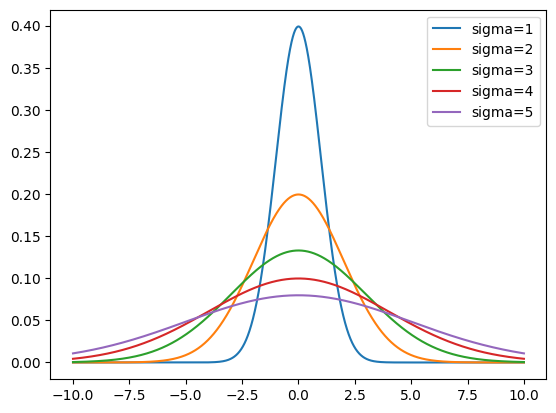

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-10, 10, 0.001)
for i in range(1, 6, 1):
    plt.plot(x_axis, norm.pdf(x_axis,0,i), label = "sigma="+str(i))

plt.legend()
plt.show()

### Gamma

Als quatre gràfics següents, apliquem el mateix classificador SVM amb _kernel_ RBF a les mateixes dades mentre mantenim el hiper-paràmetre C constant. L'única diferència entre cada gràfic és que cada vegada augmentarem el valor de `gamma`.  En fer-ho, podem veure visualment l'efecte de gamma en el límit de decisió.

#### Gamma = 0,01

En el cas del nostre classificador i dades SVM, quan s'utilitza una gamma baixa com $0.01$, el marge de decisió no és molt "corbat", sinó que és només un gran arc.

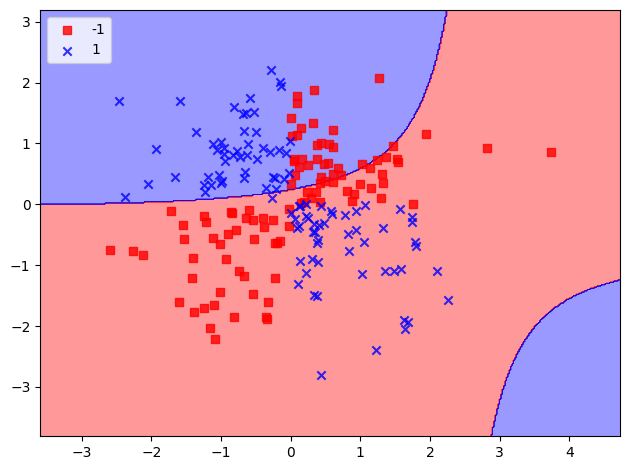

In [17]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Gamma = 1.0

Podem observar una gran diferència quan augmentem la gamma a $1$. Ara el límit de decisió comença a cobrir millor l'espai que ocupen les dades d'entrenament.

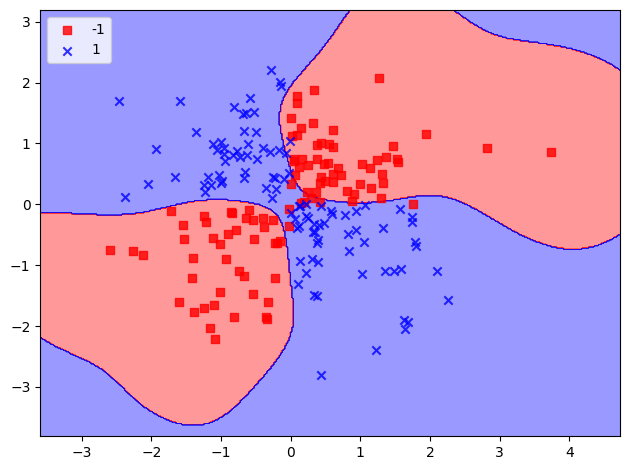

In [18]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Gamma = 10,0

A gamma = 10 el límit de decisió comença a estar molt afectat per punts de dades individuals (és a dir, la variància).

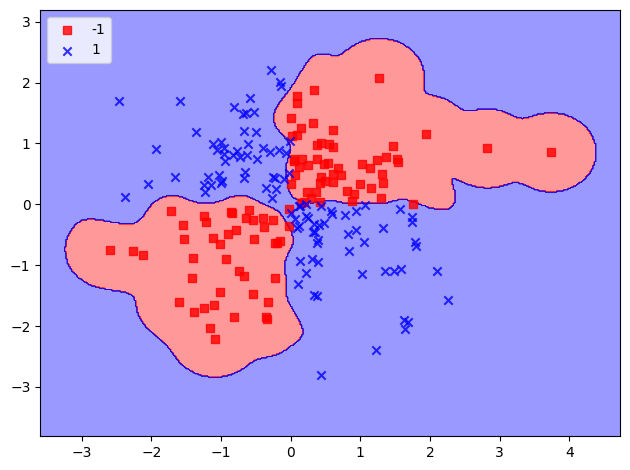

In [19]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=10, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


#### Gamma = 100,0

Amb un valor gamma massa alt, el límit de decisió depèn gairebé completament dels punts de dades individuals, creant
"illes". Aquestes dades estan clarament sobre ajustades.

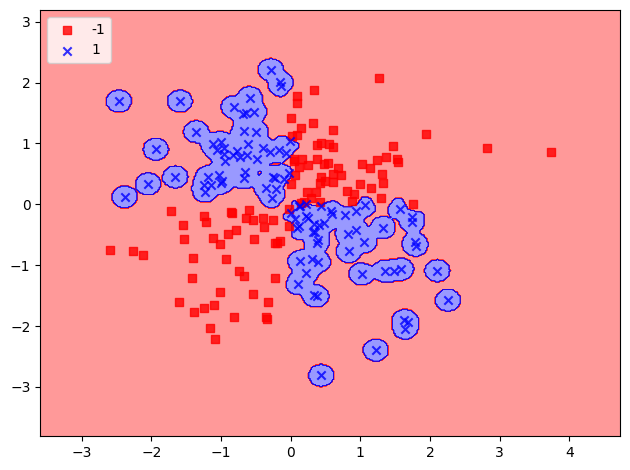

In [20]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=100, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### C - El paràmetre de penalització

`C` és un paràmetre propi de les SVM i és la penalització per classificar erròniament una observació. Quan C és petit, el classificador està d'acord amb els punts de dades mal classificats (alt biaix, baixa variància). Quan C és gran, el classificador penalitza molt les dades erròniament classificades i, per tant, evita qualsevol observació erròniament classificada (baix biaix, major  variància).

Ara repetirem el procés per a C: utilitzarem el mateix classificador, les mateixes dades i mantindrem constant gamma.
L'únic que canviarem és la C, la sanció per mala classificació.

### C = 1

Amb C = 1, el classificador tolera clarament el punt de dades mal classificat. Hi ha molts punts vermells a la regió
blava i punts blaus a la regió vermella.

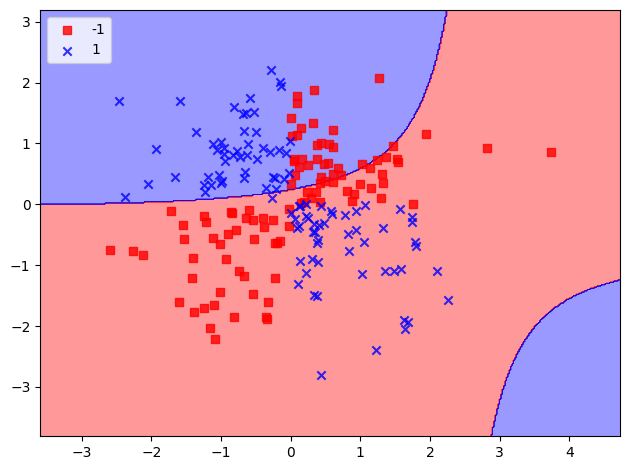

In [21]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### C = 10

A C = 10, el classificador és menys tolerant als punts de dades mal classificats i, per tant, el límit de decisió
és més sever

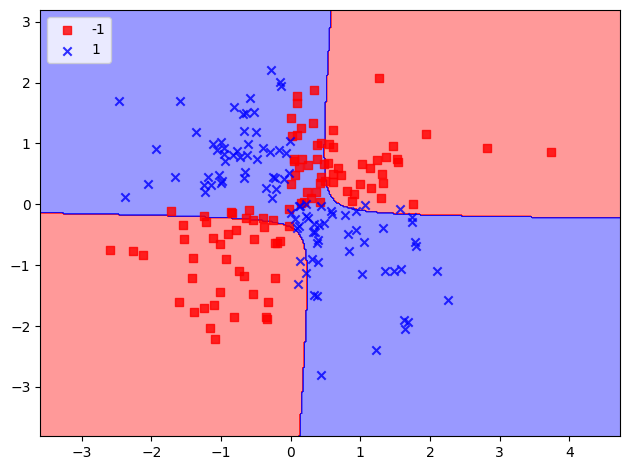

In [22]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=10)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Anem a provar amb valors de C més grans: 100, 1000, 100000:

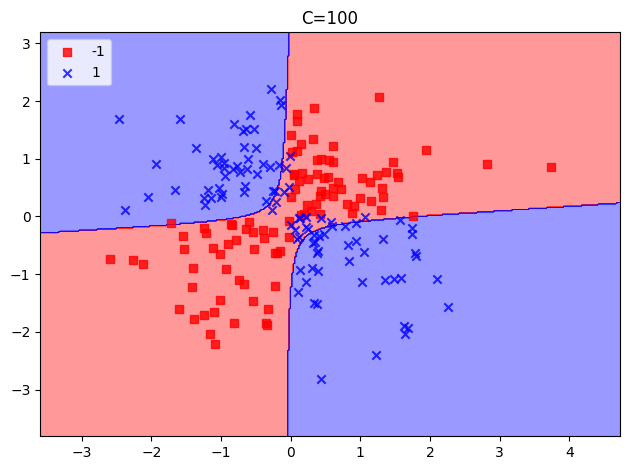

In [23]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=100)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.title("C=100")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

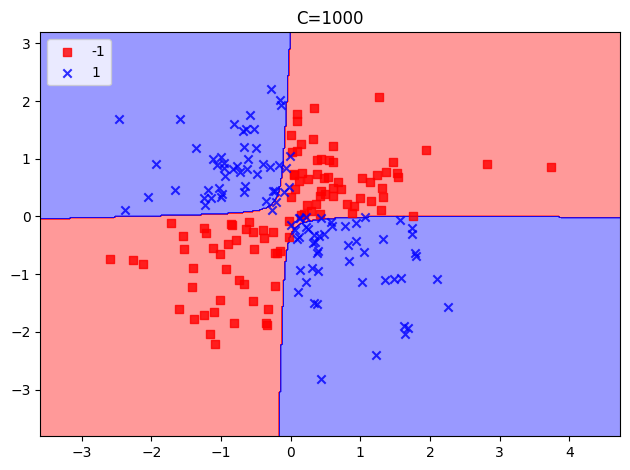

In [24]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.title("C=1000")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

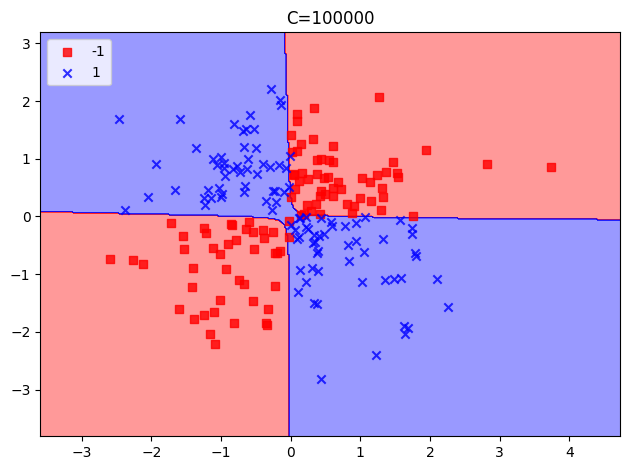

In [25]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=100000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.title("C=100000")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

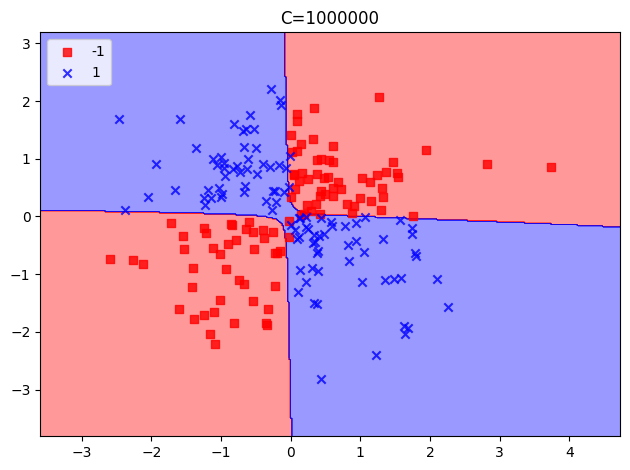

In [34]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.005, C=100000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.title("C=1000000")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Aquest codi és extret d'[aquí](https://chrisalbon.com/code/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/)
